# **Тема проекта** "Анализ данных хит-парадов американского журнала Billboard"

# Описание проекта
Проект направлен на исследование данных датасета **"Горячие еженедельные чарты Billboard"**, в котором собрана информация о лучших песнях и альбомах каждой недели за определенный период времени. При анализе данных будут использоваться различные инструменты и библиотеки Google Colab, которые помогут получить глубокое понимание трендов и тенденций в музыкальной индустрии.

# Цели и задачи проекта

**Цель проекта:** Проанализировать и выявить ключевые факторы, которые наиболее значимо влияют на популярность музыкальных треков различных исполнителей.

**Задачи:**

1. Определить наиболее популярные жанры среди слушателей.
2. Проанализировать влияние танцевальности, энергетики, валентности, инструментальности и темпа на успех песен и альбомов.
3. Определить оптимальное время прослушивания трека.
4. Исследовать влияние откровенного контента на привлекательность песен для слушателей.


# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np

df = pd.read_csv('Hot 100 Audio Features.csv')
df

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,FUTURE,...,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!Going Places!!!,...,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0


In [ ]:
#Знакомство с данными датафрейма
print(df.head())
print(df.tail())
random_lines = df.sample(n=10)
print(random_lines)
print(df.info())
print(df.dtypes)
print(df.count())
print(sys.getsizeof(df))

   index                                             SongID  \
0      0     -twistin'-White Silver SandsBill Black's Combo   
1      1  ¿Dònde Està Santa Claus? (Where Is Santa Claus...   
2      2             ......And Roses And RosesAndy Williams   
3      3           ...And Then There Were DrumsSandy Nelson   
4      4                ...Baby One More TimeBritney Spears   

            Performer                                              Song  \
0  Bill Black's Combo                      -twistin'-White Silver Sands   
1          Augie Rios  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)   
2       Andy Williams                         ......And Roses And Roses   
3        Sandy Nelson                      ...And Then There Were Drums   
4      Britney Spears                             ...Baby One More Time   

                                       spotify_genre        spotify_track_id  \
0                                                 []                     NaN   
1         

### **Выводы**

Изучив данные датафрейма Hot 100 Audio Features, можно сделать вывод, что часть данных пропущена. Благодаря методу count(), можно заметить, что больше всего потеряно информации в столбце spotify_track_preview_url (URL-адрес, ведущий на предварительную версию песни на Spotify, если таковая имеется). Методом dtype() мы выяснили, что преобладают два типа данных -   float64 и object. Также мы узнали с помощью метода getsizeof(), что датафрейм занимает 23294341 байт памяти.

In [ ]:
#Приведение кода датафрейма к змеиному регистру
df = df.rename(columns={'SongID':'song_id'})
df.columns = df.columns.str.lower()
df.info()
df = df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   song_id                    29503 non-null  object 
 2   performer                  29503 non-null  object 
 3   song                       29503 non-null  object 
 4   spotify_genre              27903 non-null  object 
 5   spotify_track_id           24397 non-null  object 
 6   spotify_track_preview_url  14491 non-null  object 
 7   spotify_track_duration_ms  24397 non-null  float64
 8   spotify_track_explicit     24397 non-null  object 
 9   spotify_track_album        24391 non-null  object 
 10  danceability               24334 non-null  float64
 11  energy                     24334 non-null  float64
 12  key                        24334 non-null  float64
 13  loudness                   24334 non-null  flo

<ipython-input-5-0e52fc859e89>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)


,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-white silver sandsbill black's combo,bill black's combo,-twistin'-white silver sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿dònde està santa claus? (where is santa claus...,augie rios,¿dònde està santa claus? (where is santa claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......and roses and rosesandy williams,andy williams,......and roses and roses,"['adult standards', 'brill building pop', 'eas...",3tvqpppxyigkrm4pr9hcf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,the essential andy williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0
3,3,...and then there were drumssandy nelson,sandy nelson,...and then there were drums,"['rock-and-roll', 'space age pop', 'surf music']",1fhhq3qhu8wprkhzhojz4a,NaN,172066.0,False,compelling percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0
4,4,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...baby one more time (digital deluxe version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,29498,zoo yorklil tjay featuring fivio foreign & pop...,lil tjay featuring fivio foreign & pop smoke,zoo york,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,29499,zoomfuture,future,zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2ig6te7jyvrtqhfeof7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,future,...,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,29500,zoomlil' boosie featuring yung joc,lil' boosie featuring yung joc,zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,29501,zorba the greekherb alpert & the tijuana brass,herb alpert & the tijuana brass,zorba the greek,"['adult standards', 'easy listening', 'lounge']",3wlevnohakzzmmpn5w7mhk,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!going places!!!,...,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0


## 2. Изучение пропущенных значений

In [ ]:
missing_values = df.isna().sum()
print(missing_values)
df.count()
#Пропущенные значения составляют примерно 20% от всех значений -> нужно заполнить пропущенные значения

#Замена пропущенных значений наиболее часто встречающимся значением (используем этот метод в данных столбцах, так как они содержат нечисловые значения)
mode_fuel_type1 = df['spotify_genre'].mode()[0]
df['spotify_genre'].fillna(mode_fuel_type1, inplace=True)

mode_fuel_type2 = df['spotify_track_id'].mode()[0]
df['spotify_track_id'].fillna(mode_fuel_type2, inplace=True)

mode_fuel_type3 = df['spotify_track_preview_url'].mode()[0]
df['spotify_track_preview_url'].fillna(mode_fuel_type3, inplace=True)

mode_fuel_type4 = df['spotify_track_album'].mode()[0]
df['spotify_track_album'].fillna(mode_fuel_type4, inplace=True)

mode_fuel_type5 = df['spotify_track_explicit'].mode()[0]
df['spotify_track_explicit'].fillna(mode_fuel_type5, inplace=True)

#Замена пропущенных значений средними значениями (используем этот метод в данных столбцах, так как они содержат числовые значения)
df['spotify_track_duration_ms'].fillna(df['spotify_track_duration_ms'].mean(), inplace=True)
df['danceability'].fillna(df['danceability'].mean(), inplace=True)
df['energy'].fillna(df['energy'].mean(), inplace=True)
df['key'].fillna(df['key'].mean(), inplace=True)
df['loudness'].fillna(df['loudness'].mean(), inplace=True)
df['mode'].fillna(df['mode'].mean(), inplace=True)
df['speechiness'].fillna(df['speechiness'].mean(), inplace=True)
df['acousticness'].fillna(df['acousticness'].mean(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace=True)
df['liveness'].fillna(df['liveness'].mean(), inplace=True)
df['valence'].fillna(df['valence'].mean(), inplace=True)
df['tempo'].fillna(df['tempo'].mean(), inplace=True)
df['time_signature'].fillna(df['time_signature'].mean(), inplace=True)
df['spotify_track_popularity'].fillna(df['spotify_track_popularity'].mean(), inplace=True)

index                            0
song_id                          0
performer                        0
song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64


## 3. Изменение типов данных

In [ ]:
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      29503 non-null  int64  
 1   song_id                    29503 non-null  object 
 2   performer                  29503 non-null  object 
 3   song                       29503 non-null  object 
 4   spotify_genre              29503 non-null  object 
 5   spotify_track_id           29503 non-null  object 
 6   spotify_track_preview_url  29503 non-null  object 
 7   spotify_track_duration_ms  29503 non-null  float64
 8   spotify_track_explicit     29503 non-null  bool   
 9   spotify_track_album        29503 non-null  object 
 10  danceability               29503 non-null  float64
 11  energy                     29503 non-null  float64
 12  key                        29503 non-null  float64
 13  loudness                   29503 non-null  flo

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-white silver sandsbill black's combo,bill black's combo,-twistin'-white silver sands,[],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
1,1,¿dònde està santa claus? (where is santa claus...,augie rios,¿dònde està santa claus? (where is santa claus?),['novelty'],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
2,2,......and roses and rosesandy williams,andy williams,......and roses and roses,"['adult standards', 'brill building pop', 'eas...",3tvqpppxyigkrm4pr9hcf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.000000,False,the essential andy williams,...,-14.063000,1.000000,0.031500,0.911000,0.000267,0.112000,0.150000,83.969000,4.000000,38.000000
3,3,...and then there were drumssandy nelson,sandy nelson,...and then there were drums,"['rock-and-roll', 'space age pop', 'surf music']",1fhhq3qhu8wprkhzhojz4a,https://p.scdn.co/mp3-preview/909f15e56869916e...,172066.000000,False,compelling percussion,...,-17.278000,0.000000,0.036100,0.002560,0.745000,0.145000,0.801000,121.962000,4.000000,11.000000
4,4,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.000000,False,...baby one more time (digital deluxe version),...,-5.745000,0.000000,0.030700,0.202000,0.000131,0.443000,0.907000,92.960000,4.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,29498,zoo yorklil tjay featuring fivio foreign & pop...,lil tjay featuring fivio foreign & pop smoke,zoo york,[],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
29499,29499,zoomfuture,future,zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2ig6te7jyvrtqhfeof7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.000000,True,future,...,-7.673000,1.000000,0.426000,0.014500,0.000000,0.263000,0.627000,150.945000,4.000000,51.000000
29500,29500,zoomlil' boosie featuring yung joc,lil' boosie featuring yung joc,zoom,"['baton rouge rap', 'deep southern trap']",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
29501,29501,zorba the greekherb alpert & the tijuana brass,herb alpert & the tijuana brass,zorba the greek,"['adult standards', 'easy listening', 'lounge']",3wlevnohakzzmmpn5w7mhk,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.000000,False,!!!going places!!!,...,-12.702000,1.000000,0.323000,0.154000,0.279000,0.058400,0.192000,82.107000,4.000000,35.000000


В данном датафрейме не нужно изменять тип данных, так как тип числовых и нечисловых значений определен правильно

## 4. Поиск дубликатов

In [ ]:

duplicates = df.duplicated()
quantity_duplicates = duplicates.sum()
quantity_duplicates

0

Дубликаты не найдены

## 5. Выводы к разделу 1

Выполнив предобработку данных, была получена детальная информация о датафрейме Hot 100 Audio Features. Были найдены пропуски в значениях(≈20% от общего числа значений), которые были заменены на средние значения или на часто встречающиеся наименования, также все столбцы были приведены к змеиному регистру. Типы данных остались первоначальными, так как подходили к значениям в столбцах. Дубликаты не найдены.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

###Индексация по координаторам

In [ ]:
df.loc[1510, 'spotify_genre']

"['album rock', 'blues rock', 'classic rock', 'country rock', 'electric blues', 'folk rock', 'hard rock', 'jam band', 'mellow gold', 'psychedelic rock', 'rock', 'roots rock', 'soft rock', 'southern rock']"

In [ ]:
df.loc[415:420, 'song_id']

,song_id
415,6 kisstrippie redd featuring juice wrld & ynw ...
416,6 mandrake
417,6 minutes of pleasurell cool j
418,6 undergroundsneaker pimps
419,"634-5789 (soulsville, u.s.a.)wilson pickett"
420,66lil yachty featuring trippie redd


In [ ]:
df[['tempo', 'time_signature']]

,tempo,time_signature
0,120.276066,3.931577
1,120.276066,3.931577
2,83.969000,4.000000
3,121.962000,4.000000
4,92.960000,4.000000
...,...,...
29498,120.276066,3.931577
29499,150.945000,4.000000
29500,120.276066,3.931577
29501,82.107000,4.000000


In [ ]:
df[df['song'].str.startswith('m')]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
15777,15777,m.a.a.d citykendrick lamar featuring mc eiht,kendrick lamar featuring mc eiht,m.a.a.d city,"['conscious hip hop', 'hip hop', 'rap', 'west ...",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
15778,15778,m.g. bluesjimmy mcgriff,jimmy mcgriff,m.g. blues,"['hammond organ', 'jazz funk', 'jazz organ', '...",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
15779,15779,m.i.l.f. $fergie,fergie,m.i.l.f. $,"['dance pop', 'pop', 'pop rap', 'post-teen pop']",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
15780,15780,m.t.a.the kingston trio,the kingston trio,m.t.a.,"['american folk revival', 'bubblegum pop', 'fo...",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
15781,15781,m'ladysly & the family stone,sly & the family stone,m'lady,"['indie pop', 'indie poptimism', 'indie rock',...",3nqxa1w7mphfzmvmpmao17,https://p.scdn.co/mp3-preview/bde332bb074525eb...,164533.000000,False,greatest hits,...,-10.739000,1.000000,0.053100,0.145000,0.043600,0.476000,0.711000,125.427000,4.000000,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17205,17205,myronlil uzi vert,lil uzi vert,myron,"['melodic rap', 'philly rap', 'rap', 'trap']",56uxdjrcuos7abx3skzhkq,https://p.scdn.co/mp3-preview/5ec9a2da75a873b0...,224954.000000,True,"{'album_type': 'album', 'artists': [{'external...",...,-6.976000,0.000000,0.298000,0.055000,0.000000,0.214000,0.573000,155.047000,4.000000,77.000000
17206,17206,myselfpost malone,post malone,myself,"['dfw rap', 'melodic rap', 'rap']",2cvofkhohgwqlliulkp2xr,https://p.scdn.co/mp3-preview/909f15e56869916e...,158120.000000,True,hollywood's bleeding,...,-4.234000,1.000000,0.034900,0.102000,0.000000,0.242000,0.405000,163.882000,4.000000,78.000000
17207,17207,mysterious waysu2,u2,mysterious ways,"['irish rock', 'permanent wave', 'rock']",50jk22el2ptizzbu2lildi,https://p.scdn.co/mp3-preview/909f15e56869916e...,243586.000000,False,achtung baby (deluxe edition),...,-8.049000,1.000000,0.027700,0.001560,0.007650,0.108000,0.697000,99.768000,4.000000,64.000000
17208,17208,mystery ladybilly ocean,billy ocean,mystery lady,"['dance rock', 'disco', 'europop', 'mellow gol...",3otcnj4jspqhioo8tpq5if,https://p.scdn.co/mp3-preview/5492632ccdb8bc6b...,234906.000000,False,the very best of billy ocean,...,-9.874000,1.000000,0.061500,0.608000,0.001990,0.284000,0.495000,109.465000,4.000000,29.000000


In [ ]:
df[29500:]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
29500,29500,zoomlil' boosie featuring yung joc,lil' boosie featuring yung joc,zoom,"['baton rouge rap', 'deep southern trap']",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
29501,29501,zorba the greekherb alpert & the tijuana brass,herb alpert & the tijuana brass,zorba the greek,"['adult standards', 'easy listening', 'lounge']",3wlevnohakzzmmpn5w7mhk,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.000000,False,!!!going places!!!,...,-12.702000,1.000000,0.323000,0.154000,0.279000,0.058400,0.192000,82.107000,4.000000,35.000000
29502,29502,zunga zengk7,k7,zunga zeng,['freestyle'],0xevppccbpovknabw3lfvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.000000,False,swing batta swing!,...,-9.642000,1.000000,0.140000,0.047800,0.000363,0.039200,0.619000,103.743000,4.000000,28.000000


###Логическая индексация

In [ ]:
df.loc[df.loc[:, 'performer'] == 'taylor swift']

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
5,5,...ready for it?taylor swift,taylor swift,...ready for it?,"['pop', 'post-teen pop']",2yla0quldqr0qaivvwn6b5,https://p.scdn.co/mp3-preview/909f15e56869916e...,208186.0,False,"{'album_type': 'album', 'artists': [{'external...",...,-6.509,1.0,0.1360,0.05270,0.000000,0.1970,0.417,160.015,4.0,73.0
16,16,'tis the damn seasontaylor swift,taylor swift,'tis the damn season,"['pop', 'post-teen pop']",7dw84mwkdwe5a6lfwxjcbg,https://p.scdn.co/mp3-preview/909f15e56869916e...,229840.0,False,"{'album_type': 'album', 'artists': [{'external...",...,-8.193,1.0,0.0312,0.73500,0.000066,0.1050,0.348,145.916,4.0,70.0
338,338,22taylor swift,taylor swift,22,"['pop', 'post-teen pop']",3bixtsfenmo7nt2j3eukra,https://p.scdn.co/mp3-preview/909f15e56869916e...,230133.0,False,red (deluxe edition),...,-6.539,1.0,0.0377,0.00270,0.002730,0.0742,0.703,104.012,4.0,62.0
871,871,afterglowtaylor swift,taylor swift,afterglow,"['dance pop', 'pop', 'post-teen pop']",1symezit3h8uzfibcs3tyi,https://p.scdn.co/mp3-preview/909f15e56869916e...,223293.0,False,lover,...,-8.746,1.0,0.0344,0.13000,0.000000,0.1140,0.399,111.011,4.0,74.0
1235,1235,all too welltaylor swift,taylor swift,all too well,"['pop', 'post-teen pop']",1q3rid1tiwupgsnfadmlvl,https://p.scdn.co/mp3-preview/909f15e56869916e...,327893.0,False,red (deluxe edition),...,-7.783,1.0,0.0255,0.03980,0.000469,0.1280,0.314,93.040,4.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28777,28777,you are in lovetaylor swift,taylor swift,you are in love,"['pop', 'post-teen pop']",4a2lfndustse8u0ecyroxe,https://p.scdn.co/mp3-preview/909f15e56869916e...,267106.0,False,1989 (deluxe edition),...,-8.894,1.0,0.0622,0.70700,0.000108,0.0903,0.319,170.109,4.0,55.0
28810,28810,you belong with me (taylor's version)taylor swift,taylor swift,you belong with me (taylor's version),"['pop', 'post-teen pop']",4p7lvhdbzn7ai6wwrh5ahc,https://p.scdn.co/mp3-preview/909f15e56869916e...,231124.0,False,"{'album_type': 'single', 'artists': [{'externa...",...,-4.856,1.0,0.0346,0.06230,0.000000,0.0885,0.474,130.033,4.0,44.0
28811,28811,you belong with metaylor swift,taylor swift,you belong with me,"['pop', 'post-teen pop']",3gcl1pydwslodcpv0ll1ch,https://p.scdn.co/mp3-preview/909f15e56869916e...,231133.0,False,fearless,...,-4.440,1.0,0.0386,0.16200,0.000013,0.1140,0.443,129.964,4.0,68.0
29054,29054,you need to calm downtaylor swift,taylor swift,you need to calm down,"['dance pop', 'pop', 'post-teen pop']",6rrnnciqgzexnqk8sq9yv5,https://p.scdn.co/mp3-preview/909f15e56869916e...,171360.0,False,lover,...,-5.617,1.0,0.0553,0.00929,0.000000,0.0637,0.714,85.026,4.0,86.0


In [ ]:
df.loc[df.loc[:, 'spotify_track_popularity'] > 95]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
1109,1109,all i want for christmas is youmariah carey,mariah carey,all i want for christmas is you,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0byg9bo50gssh3ltxe2sqn,https://p.scdn.co/mp3-preview/ab4f06069148ef85...,241106.0,False,merry christmas,...,-7.462,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0
1783,1783,astronaut in the oceanmasked wolf,masked wolf,astronaut in the ocean,['australian hip hop'],3ofmpyhv5uaq70menzb277,https://p.scdn.co/mp3-preview/2e22af4d4df81ad1...,132780.0,False,"{'album_type': 'single', 'artists': [{'externa...",...,-6.865,0.0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4.0,96.0
2157,2157,bad guybillie eilish,billie eilish,bad guy,"['electropop', 'pop']",2fxmhks0bxgsbdj92vm42m,https://p.scdn.co/mp3-preview/909f15e56869916e...,194087.0,False,when we all fall aslee,...,-10.965,1.0,0.3750,0.32800,0.130000,0.1000,0.5620,135.128,4.0,96.0
2891,2891,blinding lightsthe weeknd,the weeknd,blinding lights,"['canadian contemporary r&b', 'canadian pop', ...",0sf12qnh5qcw8qpgymfoqd,https://p.scdn.co/mp3-preview/909f15e56869916e...,201573.0,False,blinding lights,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,4.0,96.0
4201,4201,circlespost malone,post malone,circles,"['dfw rap', 'melodic rap', 'rap']",21jgcnket2qwijldfupipb,https://p.scdn.co/mp3-preview/909f15e56869916e...,215280.0,False,hollywood's bleeding,...,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0
4973,4973,dance monkeytones and i,tones and i,dance monkey,['australian pop'],2xu0oxnq2qxcpomaaujy8k,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,209438.0,False,dance monkey (stripped back) / dance monkey,...,-6.400,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0
5986,5986,don't start nowdua lipa,dua lipa,don't start now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",6wri0lac5m1rw2mnx2zveg,https://p.scdn.co/mp3-preview/ed151225213380a4...,183290.0,False,don't start now,...,-4.521,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0
6819,6819,everything i wantedbillie eilish,billie eilish,everything i wanted,"['electropop', 'pop']",3zctvfbt2brf31rlenckwj,https://p.scdn.co/mp3-preview/909f15e56869916e...,245425.0,False,everything i wanted,...,-14.454,0.0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,4.0,97.0
7008,7008,fallingtrevor daniel,trevor daniel,falling,"['alternative r&b', 'melodic rap']",4tnjeawoew0ektkievjyca,https://p.scdn.co/mp3-preview/dac6a7bd1f1333d1...,159381.0,False,falling,...,-8.756,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0
15169,15169,lose you to love meselena gomez,selena gomez,lose you to love me,"['dance pop', 'pop', 'post-teen pop']",1hfmvbkm75vxsfsq5vefz5,https://p.scdn.co/mp3-preview/909f15e56869916e...,206458.0,False,lose you to love me,...,-9.005,1.0,0.0438,0.57600,0.000000,0.2100,0.0916,101.993,4.0,96.0


In [ ]:
df[(df['performer'] != 'billie eilish') & (df['spotify_track_popularity'] >= 95)]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
1108,1108,all i want for christmas is youmariah carey,mariah carey,all i want for christmas is you,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0byg9bo50gssh3ltxe2sqn,https://p.scdn.co/mp3-preview/ab4f06069148ef85...,241106.0,False,merry christmas,...,-7.462,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,95.0
1109,1109,all i want for christmas is youmariah carey,mariah carey,all i want for christmas is you,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0byg9bo50gssh3ltxe2sqn,https://p.scdn.co/mp3-preview/ab4f06069148ef85...,241106.0,False,merry christmas,...,-7.462,1.0,0.0386,0.16400,0.000000,0.0708,0.3460,150.277,4.0,97.0
1783,1783,astronaut in the oceanmasked wolf,masked wolf,astronaut in the ocean,['australian hip hop'],3ofmpyhv5uaq70menzb277,https://p.scdn.co/mp3-preview/2e22af4d4df81ad1...,132780.0,False,"{'album_type': 'single', 'artists': [{'externa...",...,-6.865,0.0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4.0,96.0
2891,2891,blinding lightsthe weeknd,the weeknd,blinding lights,"['canadian contemporary r&b', 'canadian pop', ...",0sf12qnh5qcw8qpgymfoqd,https://p.scdn.co/mp3-preview/909f15e56869916e...,201573.0,False,blinding lights,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,4.0,96.0
4201,4201,circlespost malone,post malone,circles,"['dfw rap', 'melodic rap', 'rap']",21jgcnket2qwijldfupipb,https://p.scdn.co/mp3-preview/909f15e56869916e...,215280.0,False,hollywood's bleeding,...,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,4.0,98.0
4973,4973,dance monkeytones and i,tones and i,dance monkey,['australian pop'],2xu0oxnq2qxcpomaaujy8k,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,209438.0,False,dance monkey (stripped back) / dance monkey,...,-6.400,0.0,0.0924,0.69200,0.000104,0.1490,0.5130,98.027,4.0,100.0
5272,5272,deja vuolivia rodrigo,olivia rodrigo,deja vu,['pop'],61kpqadow081i2asbelcsb,https://p.scdn.co/mp3-preview/909f15e56869916e...,215507.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-7.236,1.0,0.1160,0.59300,0.000011,0.3410,0.1720,181.088,4.0,95.0
5986,5986,don't start nowdua lipa,dua lipa,don't start now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",6wri0lac5m1rw2mnx2zveg,https://p.scdn.co/mp3-preview/ed151225213380a4...,183290.0,False,don't start now,...,-4.521,0.0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,4.0,97.0
6318,6318,drivers licenseolivia rodrigo,olivia rodrigo,drivers license,['pop'],7lpn2dximsvn7xuktow1cs,https://p.scdn.co/mp3-preview/909f15e56869916e...,242013.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-8.761,1.0,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4.0,95.0
7008,7008,fallingtrevor daniel,trevor daniel,falling,"['alternative r&b', 'melodic rap']",4tnjeawoew0ektkievjyca,https://p.scdn.co/mp3-preview/dac6a7bd1f1333d1...,159381.0,False,falling,...,-8.756,0.0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,4.0,97.0


In [ ]:
df[(df['time_signature'] > 4) | (df['liveness'] >= 0.2)]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
4,4,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...baby one more time (digital deluxe version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0
13,13,'til summer comes aroundkeith urban,keith urban,'til summer comes around,"['australian country', 'contemporary country',...",1ckmi1iqjvevb3f7vmjmm3,https://p.scdn.co/mp3-preview/909f15e56869916e...,331466.0,False,defying gravity,...,-7.608,0.0,0.0331,0.59300,0.000136,0.770,0.308,127.907,4.0,42.0
17,17,"""b"" girlsyoung and restless",young and restless,"""b"" girls",[],0rwuhulflscxqscq7kwkde,https://p.scdn.co/mp3-preview/c551cbcaadd17bf4...,242106.0,False,something to get you hyped,...,-11.913,1.0,0.4390,0.01600,0.000000,0.312,0.769,193.762,3.0,20.0
18,18,"""cherry cherry"" from hot august nightneil diamond",neil diamond,"""cherry cherry"" from hot august night","['adult standards', 'brill building pop', 'fol...",18ocy9be9sxweenolgdfks,https://p.scdn.co/mp3-preview/909f15e56869916e...,443320.0,False,hot august night / nyc (live from madison squa...,...,-5.061,1.0,0.1370,0.09410,0.000907,0.867,0.604,172.349,4.0,16.0
23,23,('til) i kissed youthe everly brothers,the everly brothers,('til) i kissed you,"['adult standards', 'brill building pop', 'bub...",2ertdgdozmjjnanhjhwxhj,https://p.scdn.co/mp3-preview/c1719c80d7145e73...,146066.0,False,the very best of the everly brothers,...,-11.689,0.0,0.0459,0.40100,0.000000,0.299,0.701,139.567,4.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29473,29473,yours lovejoe simon,joe simon,yours love,"['classic soul', 'motown', 'philly soul', 'sou...",5fk2oulchww9zpgxbq7aad,https://p.scdn.co/mp3-preview/98e4643e6d993aa7...,182560.0,False,the chokin' kind,...,-13.287,1.0,0.0337,0.61300,0.000028,0.201,0.805,82.279,4.0,10.0
29477,29477,youth gone wildskid row,skid row,youth gone wild,"['album rock', 'glam metal', 'hard rock', 'met...",1jf5id0opfu1mae8beuf5u,https://p.scdn.co/mp3-preview/e5eaa9cf8dea9421...,198906.0,False,skid row,...,-11.277,0.0,0.0436,0.00202,0.000127,0.357,0.633,117.367,4.0,64.0
29478,29478,youth of the nationp.o.d.,p.o.d.,youth of the nation,"['alternative metal', 'funk metal', 'nu metal'...",0urwr7jnu1heq1o99zwud0,https://p.scdn.co/mp3-preview/e539c574dfe89ea3...,256240.0,False,satellite (u.s. version wea distribution),...,-7.533,1.0,0.0621,0.00834,0.010600,0.390,0.517,97.867,4.0,71.0
29493,29493,zing went the strings of my heartthe trammps,the trammps,zing went the strings of my heart,"['disco', 'motown', 'philly soul', 'post-disco']",6qkdsykk6pq2wwusgnpgqi,https://p.scdn.co/mp3-preview/b89d82622921dbd2...,202693.0,False,the trammps,...,-5.257,1.0,0.0629,0.03380,0.000001,0.318,0.830,120.132,4.0,32.0


In [ ]:
df.loc[df.loc[:, 'instrumentalness'] <= 0.000001]

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
5,5,...ready for it?taylor swift,taylor swift,...ready for it?,"['pop', 'post-teen pop']",2yla0quldqr0qaivvwn6b5,https://p.scdn.co/mp3-preview/909f15e56869916e...,208186.0,False,"{'album_type': 'album', 'artists': [{'external...",...,-6.509,1.0,0.1360,0.05270,0.000000,0.1970,0.417,160.015,4.0,73.0
14,14,'til you do me rightafter 7,after 7,'til you do me right,"['funk', 'neo soul', 'new jack swing', 'quiet ...",3kgmziz884mlv1ocwrarmn,https://p.scdn.co/mp3-preview/909f15e56869916e...,295000.0,False,reflections,...,-7.563,1.0,0.0264,0.07810,0.000000,0.0763,0.433,76.744,4.0,42.0
17,17,"""b"" girlsyoung and restless",young and restless,"""b"" girls",[],0rwuhulflscxqscq7kwkde,https://p.scdn.co/mp3-preview/c551cbcaadd17bf4...,242106.0,False,something to get you hyped,...,-11.913,1.0,0.4390,0.01600,0.000000,0.3120,0.769,193.762,3.0,20.0
23,23,('til) i kissed youthe everly brothers,the everly brothers,('til) i kissed you,"['adult standards', 'brill building pop', 'bub...",2ertdgdozmjjnanhjhwxhj,https://p.scdn.co/mp3-preview/c1719c80d7145e73...,146066.0,False,the very best of the everly brothers,...,-11.689,0.0,0.0459,0.40100,0.000000,0.2990,0.701,139.567,4.0,53.0
28,28,(all of a sudden) my heart singspaul anka,paul anka,(all of a sudden) my heart sings,"['adult standards', 'brill building pop', 'can...",5eeq19q3ft77gpsenezl2i,https://p.scdn.co/mp3-preview/e7eea243b469d67e...,184200.0,False,paul aka sigs his big te,...,-11.898,1.0,0.0327,0.80900,0.000000,0.2690,0.390,111.322,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29492,29492,zezekodak black featuring travis scott & offset,kodak black featuring travis scott & offset,zeze,"['florida rap', 'hip hop', 'melodic rap', 'mia...",0fz4dmg8jjjapjnvbizd9z,https://p.scdn.co/mp3-preview/6ccc75509be729ff...,228759.0,True,dying to live,...,-5.788,0.0,0.1760,0.05210,0.000000,0.0924,0.504,98.043,4.0,84.0
29493,29493,zing went the strings of my heartthe trammps,the trammps,zing went the strings of my heart,"['disco', 'motown', 'philly soul', 'post-disco']",6qkdsykk6pq2wwusgnpgqi,https://p.scdn.co/mp3-preview/b89d82622921dbd2...,202693.0,False,the trammps,...,-5.257,1.0,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,32.0
29495,29495,zip codethe five americans,the five americans,zip code,"['bubblegum pop', 'classic garage rock', 'frea...",7htw791cedfslw2woucvyp,https://p.scdn.co/mp3-preview/dbdb31b788ce42e4...,175040.0,False,the five americans (rerecorded versions),...,-5.986,1.0,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,5.0
29497,29497,zombiebad wolves,bad wolves,zombie,"['alternative metal', 'metal', 'post-grunge']",1vnoa9f5asnlbisfekdmg3,https://p.scdn.co/mp3-preview/4978147ac417f060...,254805.0,False,zombie,...,-3.244,0.0,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,74.0


## 2. Сортировка данных

In [ ]:
sorted_spotify_track_popularity = df.sort_values(by='spotify_track_popularity')
sorted_spotify_track_popularity

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
7973,7973,get backroy head,roy head,get back,[],0290rpkx79wgpuq89i7c7o,https://p.scdn.co/mp3-preview/ef35e834fe30508a...,137706.0,False,super hits: scepter/wand pop - volume 1,...,-5.274,1.0,0.2480,0.3110,0.000186,0.2460,0.940,93.373,4.0,0.0
20974,20974,serenadeshades,shades,serenade,['electronic trap'],7aebh5s6gxccpd1itwnv9u,https://p.scdn.co/mp3-preview/ed4f27d39d7513fe...,80533.0,False,sensual piano music for the min,...,-11.987,1.0,0.0268,0.7970,0.540000,0.0744,0.347,156.001,4.0,0.0
5131,5131,day and nightthe wackers,the wackers,day and night,[],1yrhgqib5wek7pgkmfja6f,https://p.scdn.co/mp3-preview/a4625b1d362ac115...,186253.0,False,rhino hi-five: the wackers,...,-10.158,1.0,0.0697,0.3230,0.000006,0.1030,0.964,165.228,4.0,0.0
24467,24467,the green leaves of summerkenny ball and his j...,kenny ball and his jazzmen,the green leaves of summer,['dixieland'],1fr9ln5agksbmjyi0qlwmg,https://p.scdn.co/mp3-preview/d53254f490734595...,242533.0,False,have a drink on me (live),...,-13.595,1.0,0.0660,0.7810,0.133000,0.8480,0.845,178.058,4.0,0.0
4848,4848,crygodley & creme,godley & creme,cry,"['classic uk pop', 'zolo']",24rqxcv5xncuyx4dv3qws6,https://p.scdn.co/mp3-preview/ba32a478c319df93...,291960.0,False,sweet surrender,...,-7.392,1.0,0.0340,0.0833,0.000011,0.3680,0.274,100.023,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16256,16256,memoriesmaroon 5,maroon 5,memories,"['pop', 'pop rock']",2b8foow8uzydfae27yhozm,https://p.scdn.co/mp3-preview/909f15e56869916e...,189486.0,False,memories,...,-7.209,1.0,0.0546,0.8370,0.000000,0.0822,0.575,91.019,4.0,98.0
4201,4201,circlespost malone,post malone,circles,"['dfw rap', 'melodic rap', 'rap']",21jgcnket2qwijldfupipb,https://p.scdn.co/mp3-preview/909f15e56869916e...,215280.0,False,hollywood's bleeding,...,-3.497,1.0,0.0395,0.1920,0.002440,0.0863,0.553,120.042,4.0,98.0
20368,20368,roxannearizona zervas,arizona zervas,roxanne,['pop rap'],696dnlkudoxcmankltgxxk,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,163636.0,True,roxanne,...,-5.616,0.0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,5.0,99.0
16613,16613,montero (call me by your name)lil nas x,lil nas x,montero (call me by your name),"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",67btfxlnbhbmcdr2l2l8qd,https://p.scdn.co/mp3-preview/fee76abaab413004...,137875.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-6.682,0.0,0.1520,0.2970,0.000000,0.3840,0.758,178.818,4.0,100.0


In [ ]:
sorted_energy = df.sort_values(by='energy')
sorted_energy[['performer',"song", "energy", 'spotify_track_popularity']]

,performer,song,energy,spotify_track_popularity
7928,jan & dean,gee,0.000581,0.0
22578,frank sinatra,stardust,0.018100,31.0
22904,mr. acker bilk,stranger on the shore,0.020100,7.0
15960,roberta flack,making love,0.020400,36.0
4755,patsy cline,crazy,0.021000,65.0
...,...,...,...,...
12223,suzi quatro,i've never been in love,0.995000,23.0
11165,donna summer,i love you,0.995000,37.0
13506,jane's addiction,just because,0.996000,55.0
26495,five finger death punch,under and over it,0.996000,62.0


In [ ]:
sorted_danceability = df.sort_values(by='danceability')
sorted_danceability[['performer',"song", "danceability", 'spotify_track_popularity']]

,performer,song,danceability,spotify_track_popularity
556,jimmy clanton,a letter to an angel,0.000,7.0
1445,elvis presley,an american trilogy,0.103,44.0
4023,andy williams,charade,0.105,23.0
12808,the moody blues,isn't life strange,0.107,35.0
29186,the brooklyn bridge,you'll never walk alone,0.110,3.0
...,...,...,...,...
22624,the jacksons,state of shock,0.980,43.0
12233,glee cast,ice ice baby,0.980,35.0
3879,dj suede the remix god,cash me outside (#cashmeoutside),0.981,45.0
8395,pitbull featuring trina & young bo$$,go girl,0.986,51.0


In [ ]:
sorted_tempo = df.sort_values(by='tempo')
sorted_tempo[['performer',"song", "tempo", 'spotify_track_popularity']]

,performer,song,tempo,spotify_track_popularity
556,jimmy clanton,a letter to an angel,0.000,7.0
27568,eddy arnold,what's he doing in my world,35.716,14.0
12287,shai,if i ever fall in love,36.710,57.0
22751,paul simon,still crazy after all these years,37.114,61.0
3355,the miracles,broken hearted,47.940,8.0
...,...,...,...,...
15697,journey,"lovin', touchin', squeezin'",211.261,60.0
5434,"jamie foxx featuring drake, kanye west + the-d...",digital girl,213.737,35.0
11096,donovan,i like you,216.200,1.0
26267,ace cannon,tuff,233.429,19.0


In [ ]:
sorted_instrumentalness = df.sort_values(by='instrumentalness')
sorted_instrumentalness[['performer',"song", "instrumentalness", 'spotify_track_popularity']]

,performer,song,instrumentalness,spotify_track_popularity
11618,the platters,i wish,0.000,20.0
7464,aldo nova,foolin' yourself,0.000,28.0
25306,sam salter,there you are,0.000,30.0
15643,keyshia cole,love,0.000,69.0
15642,wale featuring sam dew,lovehate thing,0.000,50.0
...,...,...,...,...
15460,frank mills,"love me, love me love",0.966,15.0
13950,auburn featuring iyaz,la la la,0.978,9.0
14022,chris kenner,land of 1000 dances,0.981,12.0
20628,darude,sandstorm,0.982,62.0


In [ ]:
sorted_valence = df.sort_values(by='valence')
sorted_valence[['performer',"song", "valence", 'spotify_track_popularity']]

,performer,song,valence,spotify_track_popularity
556,jimmy clanton,a letter to an angel,0.0000,7.0
16368,coldplay,midnight,0.0349,66.0
13930,a$ap rocky,l$d,0.0352,76.0
1382,the pipes and drums and the military band of t...,amazing grace,0.0359,31.0
5165,drake,days in the east,0.0361,60.0
...,...,...,...,...
14445,dick dale and the del-tones,let's go trippin',0.9870,19.0
9759,john sebastian,hideaway,0.9880,9.0
19524,katrina and the waves,que te quiero,0.9890,27.0
15715,war,low rider,0.9900,60.0


In [ ]:
sorted_spotify_track_duration_ms = df.sort_values(by='spotify_track_duration_ms')
sorted_spotify_track_duration_ms[['performer',"song", "spotify_track_duration_ms", 'spotify_track_popularity']]

,performer,song,spotify_track_duration_ms,spotify_track_popularity
19626,luke featuring no good but so good,raise the roof,29688.0,0.0
2421,kid cudi,beautiful trip,37013.0,56.0
25409,chris young duet with cassadee pope,think of you,46253.0,18.0
2128,pop smoke,bad bitch from tokyo (intro),48000.0,61.0
13287,kanye west,jesus is lord,49292.0,72.0
...,...,...,...,...
15570,donna summer,love to love you baby,1008533.0,46.0
3506,isaac hayes,by the time i get to phoenix,1124153.0,28.0
1826,kraftwerk,autobahn,1367093.0,49.0
26259,mike oldfield,tubular bells,1561133.0,52.0


##Вывод

В ходе сортировки было проверено 7 столбцов: популярность треков, энергетика, валентность, инструментальность, танцевальность, длительность и темп.

Результаты проверки столбца "spotify_track_popularity", позволяют сделать вывод о том, что самыми популярными являются разновидности жанров 'pop' и 'rap'.

Анализ результатов сортировок по столбцам "energy" и "danceability" выявил неоднозначность, но можно отметить тенденцию: песни с наибольшей энергетикой и танцевальностью имеют более высокую популярность, чем те, которые обладают меньшей.

Сортировка по столбцам "valence" и "instrumentalness" показывает, что песни с низкой позитивностью и инструментальностью популярнее.

В то же время, результаты сортировки по столбцам "tempo" и "sorted_spotify_track_duration_ms" не выявили никакого влияния темпа и длительности на популярность трека.



## 3. Фильтрация данных

## Метод query

In [ ]:
#треки исполнителей, которые содержат откровенный контент и имеют высокую популярность
result = df.query("spotify_track_explicit == True and spotify_track_popularity > 90")
result

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
424,424,7 ringsariana grande,ariana grande,7 rings,"['dance pop', 'pop', 'post-teen pop']",6ocbgovgwyjhov1ggi9nsf,https://p.scdn.co/mp3-preview/909f15e56869916e...,178626.0,True,thank,...,-10.732,0.0,0.3340,0.59200,0.000000,0.0881,0.3270,140.048,4.0,91.0
2235,2235,banditjuice wrld & youngboy never broke again,juice wrld & youngboy never broke again,bandit,"['chicago rap', 'melodic rap']",6gg1gjgki2ak4e0qzsr7sd,https://p.scdn.co/mp3-preview/909f15e56869916e...,189322.0,True,bandit (with youngboy never broke again),...,-5.884,0.0,0.3430,0.06870,0.000000,0.1320,0.4250,180.051,4.0,93.0
3096,3096,bopdababy,dababy,bop,"['nc hip hop', 'rap']",6ozh9ok6h4oi1wusltbsen,https://p.scdn.co/mp3-preview/909f15e56869916e...,159714.0,True,kirk,...,-3.909,1.0,0.3670,0.18900,0.000000,0.1290,0.8360,126.770,4.0,92.0
3607,3607,callaitabad bunny & tainy,bad bunny & tainy,callaita,"['latin', 'reggaeton', 'trap latino']",2th65lnhgvlxckxm3apjxi,https://p.scdn.co/mp3-preview/23c0b25cf824c1bf...,250533.0,True,callaita,...,-4.773,1.0,0.3090,0.60000,0.000002,0.2430,0.2440,176.169,4.0,91.0
3608,3608,callaitabad bunny & tainy,bad bunny & tainy,callaita,"['latin', 'reggaeton', 'trap latino']",2th65lnhgvlxckxm3apjxi,https://p.scdn.co/mp3-preview/23c0b25cf824c1bf...,250533.0,True,callaita,...,-4.773,1.0,0.3090,0.60000,0.000002,0.2430,0.2440,176.169,4.0,92.0
5272,5272,deja vuolivia rodrigo,olivia rodrigo,deja vu,['pop'],61kpqadow081i2asbelcsb,https://p.scdn.co/mp3-preview/909f15e56869916e...,215507.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-7.236,1.0,0.1160,0.59300,0.000011,0.3410,0.1720,181.088,4.0,95.0
6318,6318,drivers licenseolivia rodrigo,olivia rodrigo,drivers license,['pop'],7lpn2dximsvn7xuktow1cs,https://p.scdn.co/mp3-preview/909f15e56869916e...,242013.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-8.761,1.0,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4.0,95.0
7864,7864,futsal shuffle 2020lil uzi vert,lil uzi vert,futsal shuffle 2020,"['melodic rap', 'philly rap', 'pop rap', 'rap'...",2ec33avlkttq8bhfgbtdqs,https://p.scdn.co/mp3-preview/ab9ea4c65ee7c5ef...,198912.0,True,futsal shuffle 2020,...,-8.191,0.0,0.1560,0.03270,0.000000,0.2310,0.2960,136.970,4.0,91.0
8551,8551,good 4 uolivia rodrigo,olivia rodrigo,good 4 u,['pop'],6perp62tejqjghu81ohxgm,https://p.scdn.co/mp3-preview/909f15e56869916e...,178147.0,True,"{'album_type': 'single', 'artists': [{'externa...",...,-5.052,0.0,0.2040,0.30000,0.000000,0.1010,0.6680,168.560,4.0,95.0
8685,8685,goodbyespost malone featuring young thug,post malone featuring young thug,goodbyes,"['dfw rap', 'melodic rap', 'rap']",0t3zvgklmymvsdzbjaxk8c,https://p.scdn.co/mp3-preview/909f15e56869916e...,174853.0,True,hollywood's bleeding,...,-3.875,1.0,0.0810,0.45600,0.000000,0.1030,0.1630,150.068,4.0,91.0


Можно заметить, что имеется большое количество популярных песен с откровенным контентом

In [ ]:
#треки с низкой валентностью и инструментальностью, имеющие высокую популярность
result = df.query("instrumentalness < 1 and valence < 1 and spotify_track_popularity > 90")
result

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
424,424,7 ringsariana grande,ariana grande,7 rings,"['dance pop', 'pop', 'post-teen pop']",6ocbgovgwyjhov1ggi9nsf,https://p.scdn.co/mp3-preview/909f15e56869916e...,178626.0,True,thank,...,-10.732,0.0,0.3340,0.5920,0.000000,0.0881,0.327,140.048,4.0,91.0
821,821,"adictotainy, anuel aa & ozuna","tainy, anuel aa & ozuna",adicto,['pop reggaeton'],3jbt1y5mopweipzndddwvq,https://p.scdn.co/mp3-preview/909f15e56869916e...,270740.0,False,adicto (with anuel aa & ozuna),...,-4.803,0.0,0.0735,0.0170,0.000016,0.1790,0.623,80.002,4.0,91.0
823,823,adore youharry styles,harry styles,adore you,"['dance pop', 'pop', 'post-teen pop']",1m4qeo4he3pracom7exnjq,https://p.scdn.co/mp3-preview/2dbeaa922270b337...,207133.0,False,adore you,...,-3.675,1.0,0.0483,0.0237,0.000007,0.1020,0.569,99.048,4.0,91.0
1108,1108,all i want for christmas is youmariah carey,mariah carey,all i want for christmas is you,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0byg9bo50gssh3ltxe2sqn,https://p.scdn.co/mp3-preview/ab4f06069148ef85...,241106.0,False,merry christmas,...,-7.462,1.0,0.0386,0.1640,0.000000,0.0708,0.346,150.277,4.0,95.0
1109,1109,all i want for christmas is youmariah carey,mariah carey,all i want for christmas is you,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0byg9bo50gssh3ltxe2sqn,https://p.scdn.co/mp3-preview/ab4f06069148ef85...,241106.0,False,merry christmas,...,-7.462,1.0,0.0386,0.1640,0.000000,0.0708,0.346,150.277,4.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26721,26721,vetebad bunny,bad bunny,vete,"['latin', 'reggaeton', 'trap latino']",5dxxgozhkplgrbkfy91w0c,https://p.scdn.co/mp3-preview/2803e299f302d099...,192024.0,True,vete,...,-4.394,1.0,0.1880,0.0363,0.000009,0.1010,0.526,91.976,4.0,94.0
27060,27060,watermelon sugarharry styles,harry styles,watermelon sugar,"['dance pop', 'pop', 'post-teen pop']",1e9ozccix42njl0acqrivo,https://p.scdn.co/mp3-preview/0c51b5f7ed852504...,174000.0,False,watermelon sugar,...,-4.209,1.0,0.0465,0.1220,0.000000,0.3350,0.557,95.390,4.0,91.0
27761,27761,when the party's overbillie eilish,billie eilish,when the party's over,"['electropop', 'pop']",43zdsphuzlzwa9k4djhu0i,https://p.scdn.co/mp3-preview/909f15e56869916e...,196077.0,False,when we all fall aslee,...,-14.084,1.0,0.0972,0.9780,0.000040,0.0897,0.198,82.642,4.0,91.0
28423,28423,without youthe kid laroi,the kid laroi,without you,['australian hip hop'],27oeeyzk6klgbh83tsvgma,https://p.scdn.co/mp3-preview/a1514ea0f0c4f729...,161384.0,True,"{'album_type': 'album', 'artists': [{'external...",...,-7.357,1.0,0.0299,0.2130,0.000000,0.1340,0.467,93.005,4.0,91.0


In [ ]:
#треки в жанре 'pop'
result = df.query("spotify_genre.str.contains('pop')")
result

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
2,2,......and roses and rosesandy williams,andy williams,......and roses and roses,"['adult standards', 'brill building pop', 'eas...",3tvqpppxyigkrm4pr9hcf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.000000,False,the essential andy williams,...,-14.063000,1.000000,0.031500,0.911000,0.000267,0.112000,0.150000,83.969000,4.000000,38.000000
3,3,...and then there were drumssandy nelson,sandy nelson,...and then there were drums,"['rock-and-roll', 'space age pop', 'surf music']",1fhhq3qhu8wprkhzhojz4a,https://p.scdn.co/mp3-preview/909f15e56869916e...,172066.000000,False,compelling percussion,...,-17.278000,0.000000,0.036100,0.002560,0.745000,0.145000,0.801000,121.962000,4.000000,11.000000
4,4,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.000000,False,...baby one more time (digital deluxe version),...,-5.745000,0.000000,0.030700,0.202000,0.000131,0.443000,0.907000,92.960000,4.000000,77.000000
5,5,...ready for it?taylor swift,taylor swift,...ready for it?,"['pop', 'post-teen pop']",2yla0quldqr0qaivvwn6b5,https://p.scdn.co/mp3-preview/909f15e56869916e...,208186.000000,False,"{'album_type': 'album', 'artists': [{'external...",...,-6.509000,1.000000,0.136000,0.052700,0.000000,0.197000,0.417000,160.015000,4.000000,73.000000
6,6,'03 bonnie & clydejay-z featuring beyonce knowles,jay-z featuring beyonce knowles,'03 bonnie & clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljcwsdlsyj41kwqym2orw,https://p.scdn.co/mp3-preview/909f15e56869916e...,205560.000000,True,the blueprint 2 the gift & the curse,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,61.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29491,29491,zerochris brown,chris brown,zero,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",3wrp2gvxwh8vphposkhygz,https://p.scdn.co/mp3-preview/b31ee5197c3e693c...,214600.000000,True,royalty (deluxe version),...,-4.564000,0.000000,0.063800,0.051700,0.000000,0.074300,0.812000,120.993000,4.000000,58.000000
29492,29492,zezekodak black featuring travis scott & offset,kodak black featuring travis scott & offset,zeze,"['florida rap', 'hip hop', 'melodic rap', 'mia...",0fz4dmg8jjjapjnvbizd9z,https://p.scdn.co/mp3-preview/6ccc75509be729ff...,228759.000000,True,dying to live,...,-5.788000,0.000000,0.176000,0.052100,0.000000,0.092400,0.504000,98.043000,4.000000,84.000000
29495,29495,zip codethe five americans,the five americans,zip code,"['bubblegum pop', 'classic garage rock', 'frea...",7htw791cedfslw2woucvyp,https://p.scdn.co/mp3-preview/dbdb31b788ce42e4...,175040.000000,False,the five americans (rerecorded versions),...,-5.986000,1.000000,0.026700,0.039400,0.000000,0.047900,0.927000,139.535000,4.000000,5.000000
29496,29496,zip-a-dee doo-dahbob b. soxx and the blue jeans,bob b. soxx and the blue jeans,zip-a-dee doo-dah,['brill building pop'],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413


In [ ]:
#треки в жанре 'rap'
result = df.query("spotify_genre.str.contains('rap')")
result

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
6,6,'03 bonnie & clydejay-z featuring beyonce knowles,jay-z featuring beyonce knowles,'03 bonnie & clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljcwsdlsyj41kwqym2orw,https://p.scdn.co/mp3-preview/909f15e56869916e...,205560.000000,True,the blueprint 2 the gift & the curse,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,61.000000
62,62,(he's) raining in my sunshinejay & the americans,jay & the americans,(he's) raining in my sunshine,"['east coast hip hop', 'hip hop', 'pop rap', '...",120bvxqsms1m41pdbclcxa,https://p.scdn.co/mp3-preview/909f15e56869916e...,195733.000000,False,come a little bit closer: the best of jay & th...,...,-13.842000,1.000000,0.034200,0.740000,0.000011,0.139000,0.376000,110.006000,4.000000,10.000000
66,66,(hot s**t) country grammarnelly,nelly,(hot s**t) country grammar,"['dance pop', 'hip hop', 'pop', 'pop rap', 'ra...",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
83,83,(i know i got) skillzshaquille o'neal,shaquille o'neal,(i know i got) skillz,['new jersey rap'],0teq2qmfxnhcgqvyuvsbp2,https://p.scdn.co/mp3-preview/6a164d9db727f858...,263053.000000,False,shaq diesel,...,-9.705000,1.000000,0.099500,0.003660,0.425000,0.182000,0.637000,91.983000,4.000000,33.000000
221,221,(when you gonna) give it up to mesean paul fea...,sean paul featuring keyshia cole,(when you gonna) give it up to me,"['dance pop', 'dancehall', 'pop', 'pop rap']",6k8uthjebttfwxcgantqgd,https://p.scdn.co/mp3-preview/69ada952407b815b...,243880.000000,False,only hits,...,-3.040000,1.000000,0.225000,0.067000,0.000000,0.041000,0.718000,95.824000,4.000000,47.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29488,29488,zaza6ix9ine,6ix9ine,zaza,['emo rap'],5cmoyjscddcvvruivrv88q,https://p.scdn.co/mp3-preview/c1205efcf052cd0b...,115673.000000,True,"{'album_type': 'single', 'artists': [{'externa...",...,-4.192000,0.000000,0.366000,0.324000,0.000000,0.081600,0.698000,175.985000,4.000000,67.000000
29491,29491,zerochris brown,chris brown,zero,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",3wrp2gvxwh8vphposkhygz,https://p.scdn.co/mp3-preview/b31ee5197c3e693c...,214600.000000,True,royalty (deluxe version),...,-4.564000,0.000000,0.063800,0.051700,0.000000,0.074300,0.812000,120.993000,4.000000,58.000000
29492,29492,zezekodak black featuring travis scott & offset,kodak black featuring travis scott & offset,zeze,"['florida rap', 'hip hop', 'melodic rap', 'mia...",0fz4dmg8jjjapjnvbizd9z,https://p.scdn.co/mp3-preview/6ccc75509be729ff...,228759.000000,True,dying to live,...,-5.788000,0.000000,0.176000,0.052100,0.000000,0.092400,0.504000,98.043000,4.000000,84.000000
29499,29499,zoomfuture,future,zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2ig6te7jyvrtqhfeof7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.000000,True,future,...,-7.673000,1.000000,0.426000,0.014500,0.000000,0.263000,0.627000,150.945000,4.000000,51.000000


In [ ]:
#треки c темпом больше 60(средний темп песен)
result = df.query("tempo >= 60")
result

,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-white silver sandsbill black's combo,bill black's combo,-twistin'-white silver sands,[],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
1,1,¿dònde està santa claus? (where is santa claus...,augie rios,¿dònde està santa claus? (where is santa claus?),['novelty'],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
2,2,......and roses and rosesandy williams,andy williams,......and roses and roses,"['adult standards', 'brill building pop', 'eas...",3tvqpppxyigkrm4pr9hcf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.000000,False,the essential andy williams,...,-14.063000,1.000000,0.031500,0.911000,0.000267,0.112000,0.150000,83.969000,4.000000,38.000000
3,3,...and then there were drumssandy nelson,sandy nelson,...and then there were drums,"['rock-and-roll', 'space age pop', 'surf music']",1fhhq3qhu8wprkhzhojz4a,https://p.scdn.co/mp3-preview/909f15e56869916e...,172066.000000,False,compelling percussion,...,-17.278000,0.000000,0.036100,0.002560,0.745000,0.145000,0.801000,121.962000,4.000000,11.000000
4,4,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.000000,False,...baby one more time (digital deluxe version),...,-5.745000,0.000000,0.030700,0.202000,0.000131,0.443000,0.907000,92.960000,4.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,29498,zoo yorklil tjay featuring fivio foreign & pop...,lil tjay featuring fivio foreign & pop smoke,zoo york,[],1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
29499,29499,zoomfuture,future,zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2ig6te7jyvrtqhfeof7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.000000,True,future,...,-7.673000,1.000000,0.426000,0.014500,0.000000,0.263000,0.627000,150.945000,4.000000,51.000000
29500,29500,zoomlil' boosie featuring yung joc,lil' boosie featuring yung joc,zoom,"['baton rouge rap', 'deep southern trap']",1genui6m825v8jp4ukiiah,https://p.scdn.co/mp3-preview/909f15e56869916e...,220684.258187,False,greatest hits,...,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
29501,29501,zorba the greekherb alpert & the tijuana brass,herb alpert & the tijuana brass,zorba the greek,"['adult standards', 'easy listening', 'lounge']",3wlevnohakzzmmpn5w7mhk,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.000000,False,!!!going places!!!,...,-12.702000,1.000000,0.323000,0.154000,0.279000,0.058400,0.192000,82.107000,4.000000,35.000000


## Оператор where

In [ ]:
#популярные треки с большой длительностью
df.where((df['spotify_track_duration_ms'] >= 100000.0) & (df['spotify_track_popularity'] >= 70))


,index,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,...baby one more timebritney spears,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",3mjutnvvq3c8fn0mp3zhxa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...baby one more time (digital deluxe version),...,-5.745,0.0,0.0307,0.202,0.000131,0.443,0.907,92.96,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#треки с большой популярностью и танцевальностью
df.where((df['danceability'] >= 0.6) & (df['spotify_track_popularity'] >= 70))[['performer',"song",'spotify_genre',  "danceability", 'spotify_track_popularity']]

,performer,song,spotify_genre,danceability,spotify_track_popularity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",0.759,77.0
...,...,...,...,...,...
29498,NaN,NaN,NaN,NaN,NaN
29499,NaN,NaN,NaN,NaN,NaN
29500,NaN,NaN,NaN,NaN,NaN
29501,NaN,NaN,NaN,NaN,NaN


In [ ]:
#треки с большой популярностью и энергичностью
df.where((df['energy'] >= 0.6) & (df['spotify_track_popularity'] >= 70))[['performer',"song", 'spotify_genre', "energy", 'spotify_track_popularity']]


,performer,song,spotify_genre,energy,spotify_track_popularity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",0.699,77.0
...,...,...,...,...,...
29498,NaN,NaN,NaN,NaN,NaN
29499,NaN,NaN,NaN,NaN,NaN
29500,NaN,NaN,NaN,NaN,NaN
29501,NaN,NaN,NaN,NaN,NaN


In [ ]:
#треки с высокой танцевальностью и низкой валентностью
df.where((df['danceability'] > 0.5) & (df['valence'] < 0.5))[['performer',"song", 'spotify_genre', "danceability", 'valence', 'spotify_track_popularity']]


,performer,song,spotify_genre,danceability,valence,spotify_track_popularity
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
29498,NaN,NaN,NaN,NaN,NaN,NaN
29499,NaN,NaN,NaN,NaN,NaN,NaN
29500,NaN,NaN,NaN,NaN,NaN,NaN
29501,herb alpert & the tijuana brass,zorba the greek,"['adult standards', 'easy listening', 'lounge']",0.531,0.192,35.0


In [ ]:
#популярные треки с маленькой инструментальностью и высоким темпом
df.where((df['instrumentalness'] < 0.5) & (df['tempo'] > 90) & (df['spotify_track_popularity'] >= 30))[['performer',"song", 'spotify_genre', "instrumentalness", 'tempo']]


,performer,song,spotify_genre,instrumentalness,tempo
0,bill black's combo,-twistin'-white silver sands,[],0.032539,120.276066
1,augie rios,¿dònde està santa claus? (where is santa claus?),['novelty'],0.032539,120.276066
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,britney spears,...baby one more time,"['dance pop', 'pop', 'post-teen pop']",0.000131,92.960000
...,...,...,...,...,...
29498,lil tjay featuring fivio foreign & pop smoke,zoo york,[],0.032539,120.276066
29499,future,zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",0.000000,150.945000
29500,lil' boosie featuring yung joc,zoom,"['baton rouge rap', 'deep southern trap']",0.032539,120.276066
29501,NaN,NaN,NaN,NaN,NaN


## 4. Сводные таблицы

In [ ]:
print("Топ популярных жанров")
df.groupby('spotify_genre')['spotify_track_popularity'].mean().sort_values(ascending=False)

Топ популярных жанров


,spotify_track_popularity
spotify_genre,
"['alternative r&b', 'melodic rap']",97.0
"['colombian pop', 'pop']",94.0
"['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']",93.0
"['country rap', 'lgbtq+ hip hop', 'pop rap', 'queer country']",93.0
"['pop', 'post-teen pop', 'uk pop']",90.0
...,...
"['blues', 'jazz blues', 'jump blues', 'rhythm and blues', 'traditional blues']",0.0
['soundtrack'],0.0
"['alternative emo', 'emo', 'folk punk', 'indie punk', 'orgcore']",0.0


Таблица "Топ популярных жанров" показывает какими жанрами обладают популярные песни. Благодаря ей, можно лучше анализировать предпочтения слушателей.



In [ ]:
print("Темп популярных песен")
df.groupby('tempo')['spotify_track_popularity'].mean().sort_values(ascending=False)

Темп популярных песен


,spotify_track_popularity
tempo,
178.818,100.0
98.027,100.0
91.019,98.0
150.277,96.0
171.017,96.0
...,...
112.107,0.0
111.933,0.0
111.810,0.0


Результаты таблицы "Темп популярных песен" сошлись с результатами сортировки. Темп не оказывает влияния на популярность песен.

In [ ]:
print("Длительность песен")
df.groupby('spotify_track_duration_ms')['spotify_track_popularity'].mean().sort_values(ascending=False)

Длительность песен


,spotify_track_popularity
spotify_track_duration_ms,
137875.0,100.0
163636.0,99.0
183290.0,97.0
159381.0,97.0
245425.0,97.0
...,...
161784.0,0.0
156755.0,0.0
155200.0,0.0


Длительность также не оказывает влияния на рейтинг песни.


In [ ]:
print("Сводные таблицы, которые показывают влияние инструментальности, валентности, энергетики и танцевальности ")
df.groupby('valence')['spotify_track_popularity'].mean().sort_values(ascending=False)


Сводные таблицы, которые показывают влияние инструментальности, валентности, энергетики и танцевальности 


,spotify_track_popularity
valence,
0.0605,95.0
0.0804,85.0
0.0827,84.0
0.0528,84.0
0.0967,83.0
...,...
0.0798,2.0
0.0903,2.0
0.0941,0.0


In [ ]:
df.groupby('instrumentalness')['spotify_track_popularity'].mean().sort_values(ascending=False)

,spotify_track_popularity
instrumentalness,
0.657000,97.0
0.000289,93.0
0.037100,91.0
0.003150,89.0
0.008530,84.0
...,...
0.096300,0.0
0.900000,0.0
0.540000,0.0


In [ ]:
df.groupby('energy')['spotify_track_popularity'].mean().sort_values(ascending=False)

,spotify_track_popularity
energy,
0.056100,82.0
0.056500,78.0
0.997000,70.0
0.031600,69.0
0.066800,66.0
...,...
0.060300,2.0
0.092300,2.0
0.062700,0.0


In [ ]:
df.groupby('danceability')['spotify_track_popularity'].mean().sort_values(ascending=False)

,spotify_track_popularity
danceability,
0.967,76.000000
0.964,75.333333
0.919,73.500000
0.978,73.500000
0.968,70.000000
...,...
0.219,5.000000
0.187,5.000000
0.110,3.000000


По данным результатам таблиц, можно сделать такие выводы:

Валентность, или то настроение, которое эмоционально подпитывает слушателя, играет решающую роль в формировании популярности песни. Стоит отметить, что у наиболее популярных композиций наблюдается низкая валентность.

То же самое можно сказать и про инструментальность, в 21 веке люди прослушивают больше песен с минималистичными аранжировками.

Касаемо энергичности песен получился неоднозначный результат. Большинство прослушиваемых песен имеет небольшую энергетику, но также в ТОП-е можно заметить и песни с сильной энергетикой.

Танцевальность, как и валентность, играет важную роль а популярности треков. Когда песня имеет высокую танцевальность, она может вызвать желание двигаться и чувствовать себя свободно. Это особенно важно для популярных треков, которые должны быть в состоянии привлечь внимание и держать его.




## 5. Группировка данных, агрегатные функции

Максимальное значение

In [ ]:
genre_max = df.groupby('spotify_genre').agg(max_popularity = ('spotify_track_popularity', 'max')).sort_values(by = 'max_popularity', ascending = False)
genre_max

,max_popularity
spotify_genre,
['australian pop'],100.0
"['country rap', 'lgbtq+ hip hop', 'pop rap', 'queer country']",100.0
['pop rap'],99.0
"['dfw rap', 'melodic rap', 'rap']",98.0
"['pop', 'pop rock']",98.0
...,...
['christian pop'],0.0
"['ambient psychill', 'psychill']",0.0
"['blues', 'jazz blues', 'jump blues', 'rhythm and blues', 'traditional blues']",0.0


В данной таблице определены самые прослушиваемые жанры. По результатам таблицы среди популярных песен чаще всего встречаются разновидности жанров 'pop' и 'rap'.

Минимальное значение

In [ ]:
min_popularity = df.groupby('spotify_genre').agg(min_popularity_=('spotify_track_popularity', 'min'))
min_popularity

,min_popularity_
spotify_genre,
"[""australian children's music"", ""children's music""]",57.000000
"[""australian children's music""]",44.000000
"[""children's music"", 'nursery']",20.000000
"[""children's music""]",0.000000
"['21st century classical', 'choral', 'nordic contemporary classical']",41.224413
...,...
['wind quintet'],41.224413
['wu fam'],17.000000
['yacht rock'],4.000000


Самыми непопулярными жанрами оказались "australian children's music", "children's music",  'nursery', 'wu fam', 'yacht rock', 'yodeling' и 'wind quintet'.
Это может быть связано с тем, что эти жанры слишком специфичны или не соответствуют текущим музыкальным трендам.


Среднее значение

In [ ]:
mean_genre = df.groupby('spotify_genre').agg(mean_popularity=('spotify_track_popularity', 'mean')).sort_values(by = 'mean_popularity', ascending = False)
mean_genre

,mean_popularity
spotify_genre,
"['alternative r&b', 'melodic rap']",97.0
"['colombian pop', 'pop']",94.0
"['big room', 'brostep', 'dance pop', 'dutch edm', 'edm', 'house', 'pop', 'pop dance', 'slap house', 'trance', 'tropical house']",93.0
"['country rap', 'lgbtq+ hip hop', 'pop rap', 'queer country']",93.0
"['pop', 'post-teen pop', 'uk pop']",90.0
...,...
"['blues', 'jazz blues', 'jump blues', 'rhythm and blues', 'traditional blues']",0.0
['soundtrack'],0.0
"['alternative emo', 'emo', 'folk punk', 'indie punk', 'orgcore']",0.0


Выше в таблице, можно увидеть средние значения баллов жанров треков исполнителей.

Сумма

In [ ]:
genre_sum = df.groupby('spotify_genre').agg(summa=('spotify_track_popularity', 'sum')).sort_values(by = 'summa', ascending = False)
genre_sum

,summa
spotify_genre,
[],136523.803910
"['dance pop', 'pop', 'post-teen pop']",18851.468541
"['contemporary country', 'country', 'country road']",16861.897651
"['contemporary country', 'country', 'country road', 'modern country rock']",16836.570890
"['glee club', 'hollywood', 'post-teen pop']",9550.448826
...,...
"['classic uk pop', 'zolo']",0.000000
['soundtrack'],0.000000
"['alternative emo', 'emo', 'folk punk', 'indie punk', 'orgcore']",0.000000


Самая большая сумма баллов оказалась у безжанровой музыки. Это может означать, что слушатели ищут не столько конкретные жанры или направления в музыке, сколько общую эмоциональную привлекательность трека. Возможно, это свидетельствует о том, что современные слушатели более открыты к новым звукам и готовы обнаруживать новые фавориты вне рамок традиционных жанров.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

###Оценка суммы баллов за валентность, танцевальность, энергетику и инструментальность песен

In [ ]:
df['characteristics'] = df[['valence', 'danceability', 'energy', 'instrumentalness']].sum(axis=1)
df.sort_values(by='spotify_track_popularity', ascending=False).reset_index(drop=True)[['song_id', 'performer', 'valence', 'danceability', 'energy', 'instrumentalness', 'spotify_track_popularity', 'characteristics']].loc[1:20]

,song_id,performer,valence,danceability,energy,instrumentalness,spotify_track_popularity,characteristics
1,dance monkeytones and i,tones and i,0.5130,0.824,0.588,0.000104,100.0,1.925104
2,roxannearizona zervas,arizona zervas,0.4570,0.621,0.601,0.000000,99.0,1.679000
3,circlespost malone,post malone,0.5530,0.695,0.762,0.002440,98.0,2.012440
4,memoriesmaroon 5,maroon 5,0.5750,0.764,0.320,0.000000,98.0,1.659000
5,everything i wantedbillie eilish,billie eilish,0.2430,0.704,0.225,0.657000,97.0,1.829000
6,tusakarol g & nicki minaj,karol g & nicki minaj,0.5740,0.803,0.715,0.000134,97.0,2.092134
7,fallingtrevor daniel,trevor daniel,0.2360,0.784,0.430,0.000000,97.0,1.450000
8,all i want for christmas is youmariah carey,mariah carey,0.3460,0.335,0.625,0.000000,97.0,1.306000
9,don't start nowdua lipa,dua lipa,0.6770,0.794,0.793,0.000000,97.0,2.264000
10,lose you to love meselena gomez,selena gomez,0.0916,0.505,0.340,0.000000,96.0,0.936600


In [ ]:
df.sort_values(by='spotify_track_popularity', ascending=False).reset_index(drop=True)[['song_id', 'performer', 'valence', 'danceability', 'energy', 'instrumentalness', 'spotify_track_popularity', 'characteristics']].loc[25488:]

,song_id,performer,valence,danceability,energy,instrumentalness,spotify_track_popularity,characteristics
25488,i love my truckglen campbell,glen campbell,0.729,0.672,0.570,0.000029,15.0,1.971029
25489,tell himthe drew-vels,the drew-vels,0.681,0.496,0.341,0.000000,15.0,1.518000
25490,darlin'paul davis feat. susan collins,paul davis feat. susan collins,0.937,0.517,0.658,0.000000,15.0,2.112000
25491,little black bookjimmy dean,jimmy dean,0.966,0.685,0.656,0.000000,15.0,2.307000
25492,the love of my mantheola kilgore,theola kilgore,0.437,0.257,0.474,0.000047,15.0,1.168047
...,...,...,...,...,...,...,...,...
29498,t'ain't nothin' to methe coasters,the coasters,0.287,0.431,0.374,0.000010,0.0,1.092010
29499,"run, run, runronny douglas",ronny douglas,0.555,0.427,0.796,0.009530,0.0,1.787530
29500,just a dreamjimmy clanton and his rockets,jimmy clanton and his rockets,0.415,0.610,0.326,0.182000,0.0,1.533000
29501,you went back on your wordclyde mcphatter,clyde mcphatter,0.948,0.594,0.482,0.000023,0.0,2.024023


Был создан столбец 'сharacteristics', который является суммой таких факторов, как: валентность, танцевальность, энергетика и инструментальность.Суммирование баллов за критерии, указанные выше, проводились для того, чтобы понять, влияет ли сумма на окончательный балл. По получившимся результатам можно сказать, что имеющиеся факторы можно принимать во внимание по отдельности, так как их сумма не показывает уровень популярности композиций.  

###Процент песен с откровенным контентом от общего числа

In [ ]:
content = df['spotify_track_explicit'].sum()
rows = len(df)
percent = content/ rows * 100
percent

9.992204182625496

Примерно 10% от всех песен занимают песни с откровенным контентом. Возможно, причина заключается в том, что музыкальные индустрии и артисты сегодня более чувствительны к вопросам цензуры и морали.

## 7. Выводы к разделу 2

 В ходе анализа данных было обнаружено несколько закономерностей и тенденций, которые могут помочь в понимании предпочтений слушателей.

 Разновидности 'pop' и 'rap' являются самыми популярными жанрами.

 Валентность, или то настроение, которое эмоционально подпитывает слушателя, играет решающую роль в формировании популярности песни. У наиболее популярных композиций наблюдается низкая валентность. Это может быть связано с тем, что люди ищут не столько конкретные жанры или направления в музыке, сколько общую эмоциональную привлекательность трека.

 Инструментальность также влияет на успех композиции, люди прослушивают больше песен с минималистичными аранжировками. Из этого можно сделать вывод, что современные слушатели более открыты к новым звукам и готовы обнаруживать новые фавориты вне рамок традиционных жанров.

 Энергетика и танцевальность имеют неоднозначное влияние на популярность песен. Большинство прослушиваемых треков имеет небольшую энергетику, но также в ТОП-е можно заметить и песни с сильной энергетикой. Когда песня имеет высокую танцевальность, она может вызвать желание двигаться и чувствовать себя свободно. Это особенно важно для популярных треков, которые должны быть в состоянии привлечь внимание и держать его.

 Темп и длительность не влияют на рейтинг песен. Слушатели обращают свое внимание больше на красочность композиции и её эмоциональную составляющую.

 Откровенный контент составляет меньшую часть от общего числа песен(≈10%), что означает, большинство артистов придерживаются цензуры и морали. Также стоит отметить, что откровенный контент не влияет на привлекательность песен.

Приведенные результаты можно использовать для разработки бизнес-стратегии:

1. Фокусироваться на жанрах 'pop' и 'rap', которые являются самыми популярными.

2. Учитывать эмоциональное влияние музыки на слушателя.

3. Создание музыкальных треков с низкой позитивностью (валентностью) и инструментальностью может привлечь больше слушателей.

4.  Обращать внимание на энергетику и танцевальность при разработке музыкальных композиций.


# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

###Диаграмма №1 "ТОП музыкальных жанров в рейтинге Billbord"

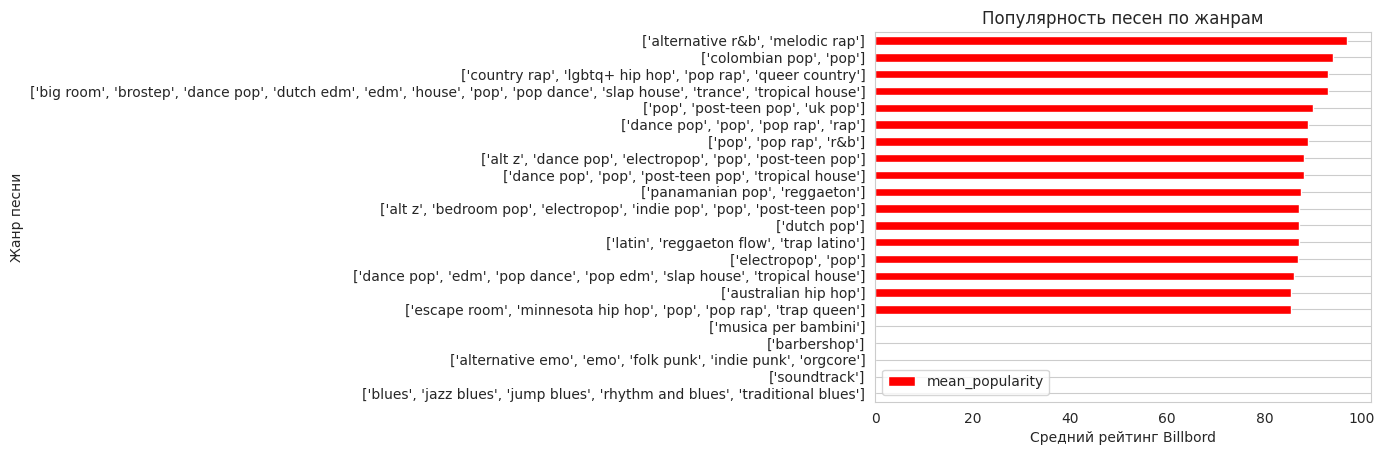

In [ ]:
mean_genre = df.groupby('spotify_genre').agg(mean_popularity=('spotify_track_popularity', 'mean')).sort_values(by = 'mean_popularity', ascending = False)
head_17 = mean_genre.head(17)
tail_5 = mean_genre.tail(5)
combined = pd.concat([tail_5, head_17]).sort_values(by = 'mean_popularity', ascending = True)
combined.plot(kind = 'barh', color = 'red')

plt.xlabel('Средний рейтинг Billbord')
plt.ylabel('Жанр песни')
plt.title('Популярность песен по жанрам')

plt.grid(axis= 'x')
plt.show()

###Диаграмма №2 "Соотношение песен с откровенным контентом к общему числу"

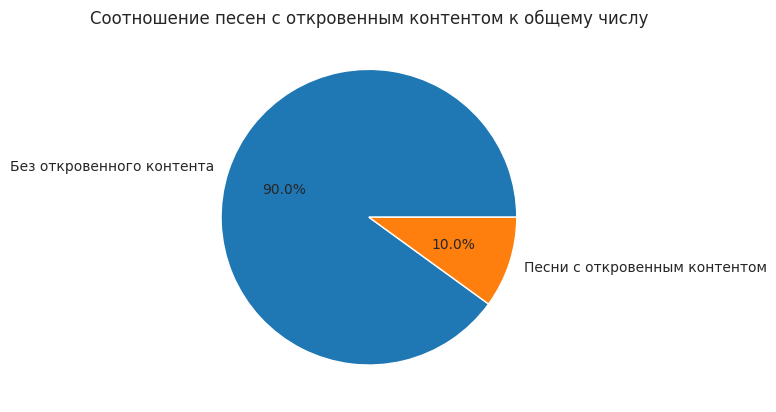

In [ ]:
# content = df['spotify_track_explicit'].sum()
# rows = len(df)
# percent = content/ rows * 100
# percent
plt.pie([100 - percent, percent],  labels=['Без откровенного контента', 'Песни с откровенным контентом'], autopct='%1.1f%%')
plt.title("Соотношение песен с откровенным контентом к общему числу")
plt.show()

###Диаграмма №3 "Гистограмма по распространённым баллам за критерий "танцевальность""


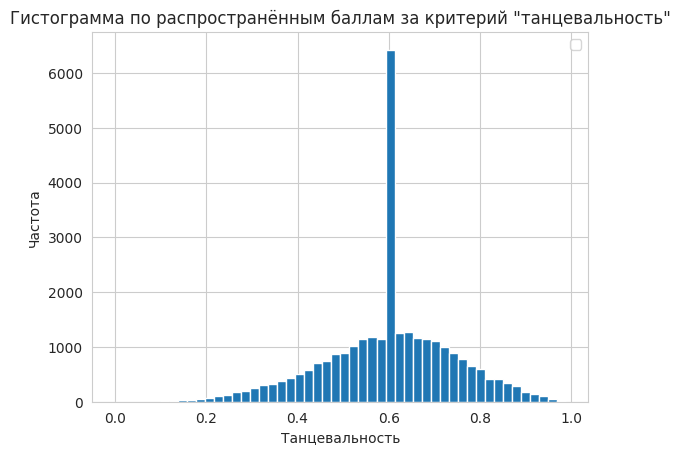

In [ ]:

fig, ax = plt.subplots()
ax.hist(df['danceability'], bins=50)
ax.set_title('Гистограмма по распространённым баллам за критерий "танцевальность"')
ax.set_xlabel('Танцевальность')
ax.set_ylabel('Частота')
plt.show()

## 2. Диаграммы, библиотека Seaborn

### Диаграмма №4: "Распространенные темпы среди популярных песен"

Text(0, 0.5, 'Популярность')

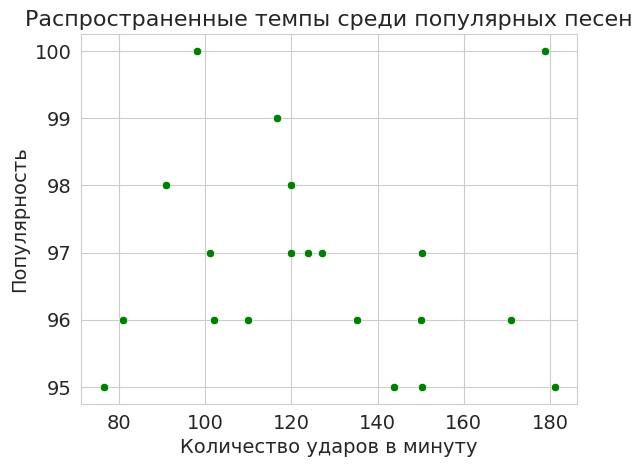

In [ ]:
sorted_df = df.sort_values(by='spotify_track_popularity', ascending=False).reset_index(drop=True)
sns.scatterplot(data=sorted_df.head(20), x="tempo", y="spotify_track_popularity");
sns.set_palette(['green'])
plt.title('Распространенные темпы среди популярных песен', fontsize=16)
plt.xlabel('Количество ударов в минуту', fontsize=14)
plt.ylabel('Популярность', fontsize=14)

### Диаграмма №5: "Энергичность первых 20-ти песен в рейтинге"

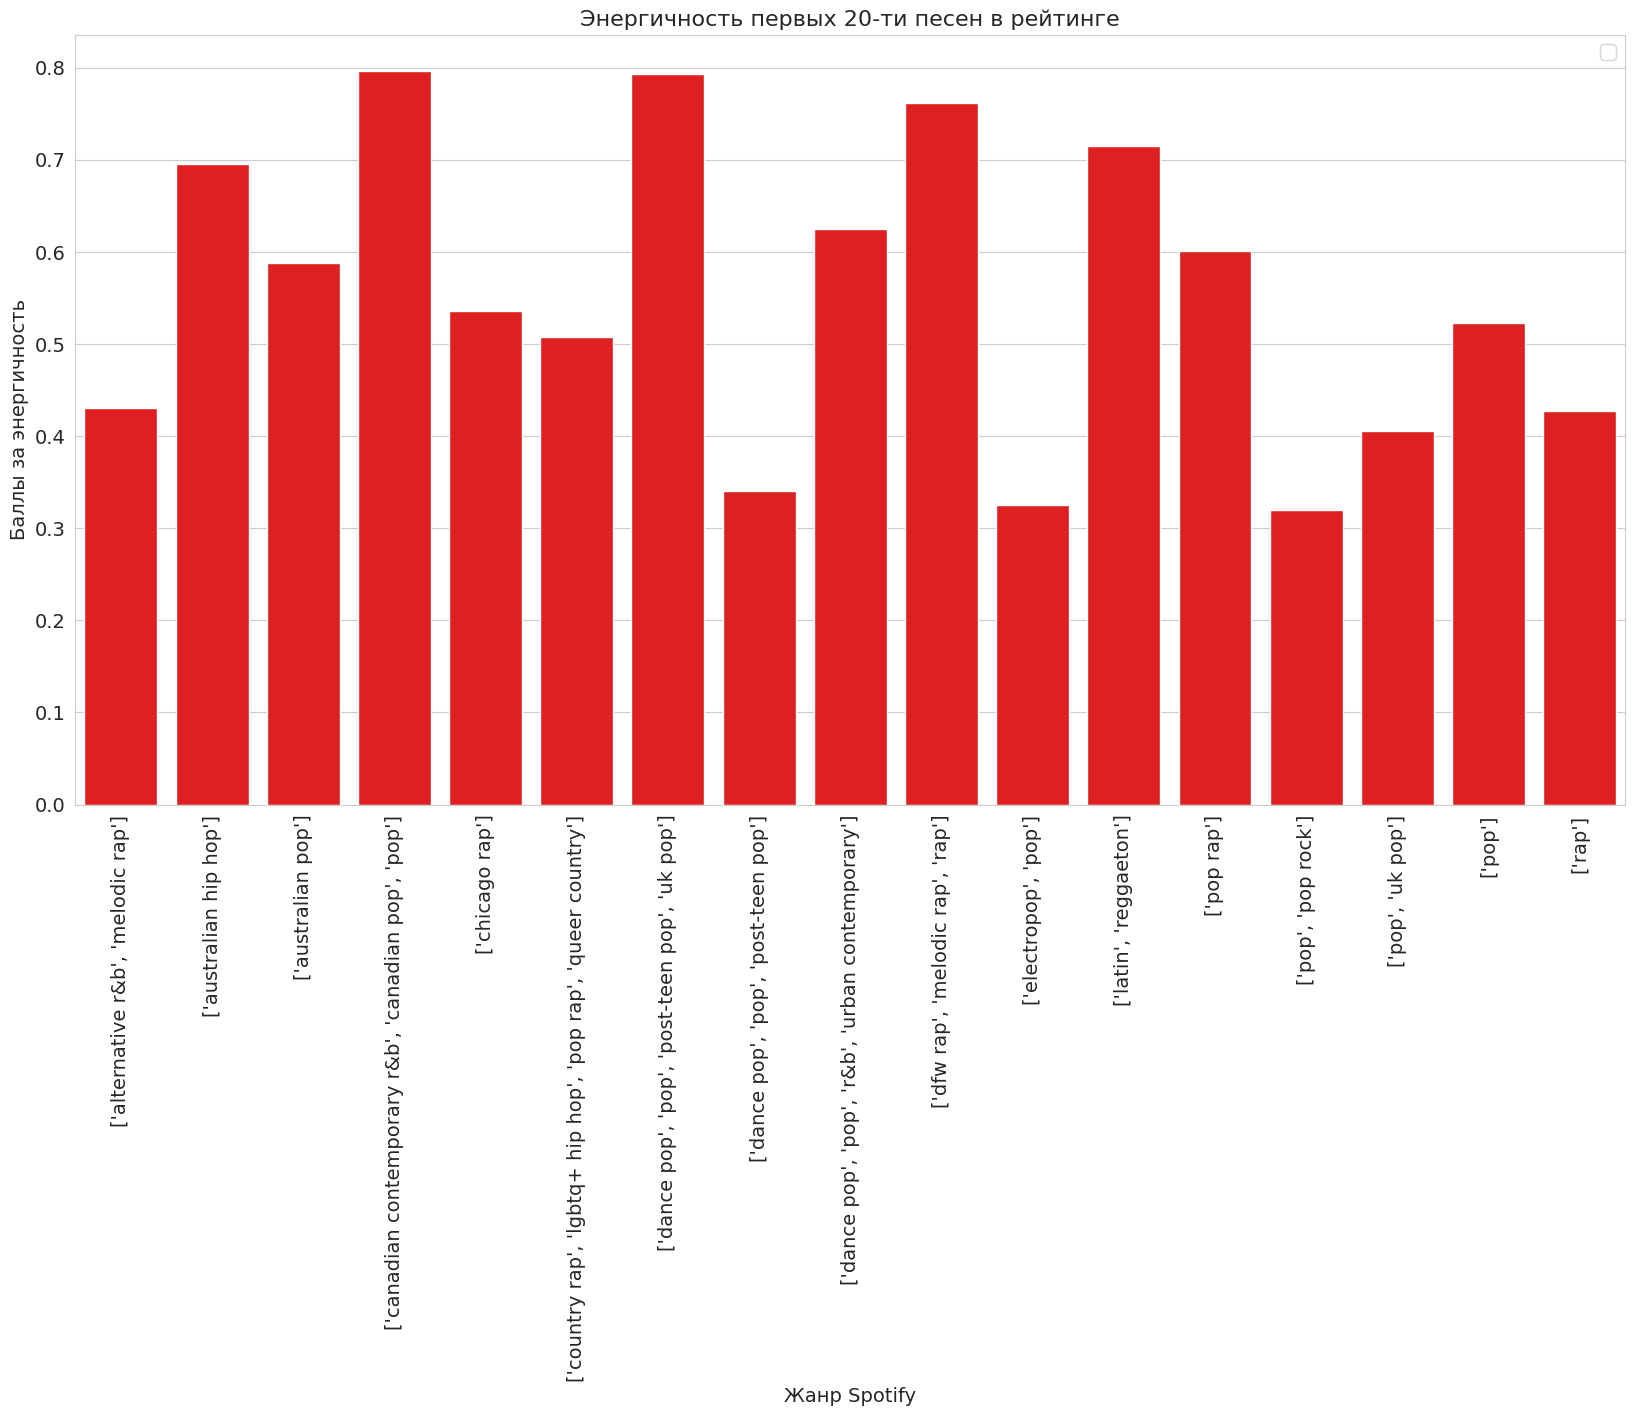

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

sorted_df = df.sort_values(by='spotify_track_popularity', ascending=False).reset_index(drop=True)
plt.figure(figsize=(20, 10))
mean_genre = sorted_df.head(20).groupby("spotify_genre")["energy"].mean()
sns.barplot(data=mean_genre.reset_index(), y="energy", x="spotify_genre")
sns.set_palette(['red'])
plt.xticks(rotation=90)
plt.rcParams['font.size'] = 14
plt.title('Энергичность первых 20-ти песен в рейтинге', fontsize=16)
plt.xlabel('Жанр Spotify', fontsize=14)
plt.ylabel('Баллы за энергичность', fontsize=14)

plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

###Портрет типичного потребителя Billbord

**Музыкальные предпочтения:**

 - Типичный потребитель Billbord отдает свое предпочтение разновидностям жанров 'pop' и 'rap'.
 - Предпочитает с низкой до умеренной валентностью, которые эмоционально подпитывают слушателя.
 - Нравится инструментальная музыка с минимальными аранжировками, так как она предполагает за собой для открытия новых артистов и стилей.
 - Оценивает энергичную и танцевальную музыку, но также наслаждается медленноц музыкой для релаксации.

**Практики прослушивания:**

 - Не придирчив к длительности композиций
 - Периодически открывает для себя новые жанры
 - Слушает песни, несмотря на наличие откровенного контента

**Дополнительная информация о типичном потребителе Billbord:**

 - Осведомлен об актуальных тенденциях в музыкальной индустрии и активно следит за ними
 - Открыт для новых жанров, артистов и стилей, указывая на готовность исследовать новые звуки
 - Имеет сформированный музыкальный вкус, отражающий его личные предпочтения

# Общий вывод по проекту

В ходе анализа данных датафрейма "Hot 100 Audio Feature" была исследована совокупность данных, содержащая информацию о музыкальном контенте, предоставляемом американским журналом Billboard. После предобработки данных был проведен комплексный анализ с использованием библиотек Matplotlib и Seaborn, позволивший выявить ключевые факторы, которые наиболее значимо влияют на популярность музыкальных треков различных исполнителей и составить "портрет" типичного потребителя.

В ходе анализа данных были успешно выполнены все поставленные задачи, включая:

1. Определены наиболее популярные жанры среди слушателей.
2. Проанализировано влияние танцевальности, энергетики, валентности, инструментальности и темпа на успех песен и альбомов.
3. Определено оптимальное время прослушивания трека.
4. Исследовано влияние откровенного контента на привлекательность песен для слушателей.

Комплексный анализ датафрейма "Hot 100 Audio Feature"  позволил выявить ключевые факторы, влияющие на популярность музыкального контента в чартах Billboard. Исследование предоставило ценные знания о музыкальных предпочтениях аудитории и тенденциях в индустрии, а также помогло составить портрет типичного потребителя. Результаты анализа могут быть использованы для оптимизации контентных стратегий, повышения удовлетворенности слушателей и принятия обоснованных решений в музыкальном бизнесе.